In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import random
import os

PATH = "open/"

In [2]:
# Random-Seed 고정
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [4]:
# train, test데이터셋 불러오기
train_df = pd.read_csv(PATH + 'train.csv', encoding='utf-8-sig')
test_df = pd.read_csv(PATH + 'test.csv', encoding='utf-8-sig')
trade_df = pd.read_csv(PATH + 'international_trade.csv', encoding='utf-8-sig')

## train 데이터셋 구성
- **ID:** 품목, 유통법인, 지역코드로 구성된 식별자
- **timestamp:** 유통 날짜
- **item:** 품목코드 (TG: 감귤/ BC: 브로콜리/ RD: 무/ CR: 당근/ CB: 양배추)
- **corporation:** 유통 법인 코드 (A부터 F까지 존재)
- **location:** 지역 코드 (J: 제주도 제주시/ S: 제주도 서귀포시)
- **supply(kg):** 유통된 물량, kg단위
- **price(원/kg):** 유통된 품목들의 kg당 가격

In [4]:
train_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


- **train 데이터셋은 2019-01-01부터 2023-03-03까지의 데이터가 존재**

## test 데이터셋 구성
- train 데이터셋의 supply(kg)와 price(원/kg)는 제외된 컬럼으로 구성되어 있음

In [5]:
test_df
# test 데이터셋에는 supply 컬럼과 price 컬럼이 없음.

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


- **test 데이터셋은 2023-03-04부터 2023-03-31까지의 데이터가 존재**

## trade 데이터셋 구성
- **기간:** 무역데이터의 기간(월별)
- **품목명:** 무역되는 품목의 이름
- **수출 중량:** 해당 품목의 수출 중량
- **수출 금액:** 해당 품목의 수출 금액
- **수입 중량:** 해당 품목의 수입 중량
- **수입 금액:** 해당 품목의 수임 금액
- **무역수지:** 수출 금액과 수입 금액의 차이

In [6]:
trade_df

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


- **trade 데이터셋은 2019-01월부터 2023-02월까지 데이터가 존재**

## [ 데이터 확인 ]

In [7]:
# train 데이터셋 정보, 결측치 확인하기
display(train_df.info())
display(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


None

ID             0
timestamp      0
item           0
corporation    0
location       0
supply(kg)     0
price(원/kg)    0
dtype: int64

In [8]:
# test 데이터셋 정보 확인하기
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1092 non-null   object
 1   timestamp    1092 non-null   object
 2   item         1092 non-null   object
 3   corporation  1092 non-null   object
 4   location     1092 non-null   object
dtypes: object(5)
memory usage: 42.8+ KB


## - 각 컬럼들의 기본 통계값 확인

In [5]:
train_df.describe(include='all')ㅌ

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
count,59397,59397,59397,59397,59397,5.939700e+04,59397.000000
unique,59397,1523,5,6,2,NaN,NaN
top,TG_A_J_20190101,2019-01-01,TG,A,J,NaN,NaN
freq,1,39,15230,13707,35029,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.189453e+04,1131.680674
std,NaN,NaN,NaN,NaN,NaN,5.226400e+04,2029.941445
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000
50%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000
75%,NaN,NaN,NaN,NaN,NaN,3.800000e+03,1519.000000


/var/folders/b4/44by_8095p37nnx24_7z5r0w0000gn/T/ipykernel_12943/4185313543.py:19: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/choisusie/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


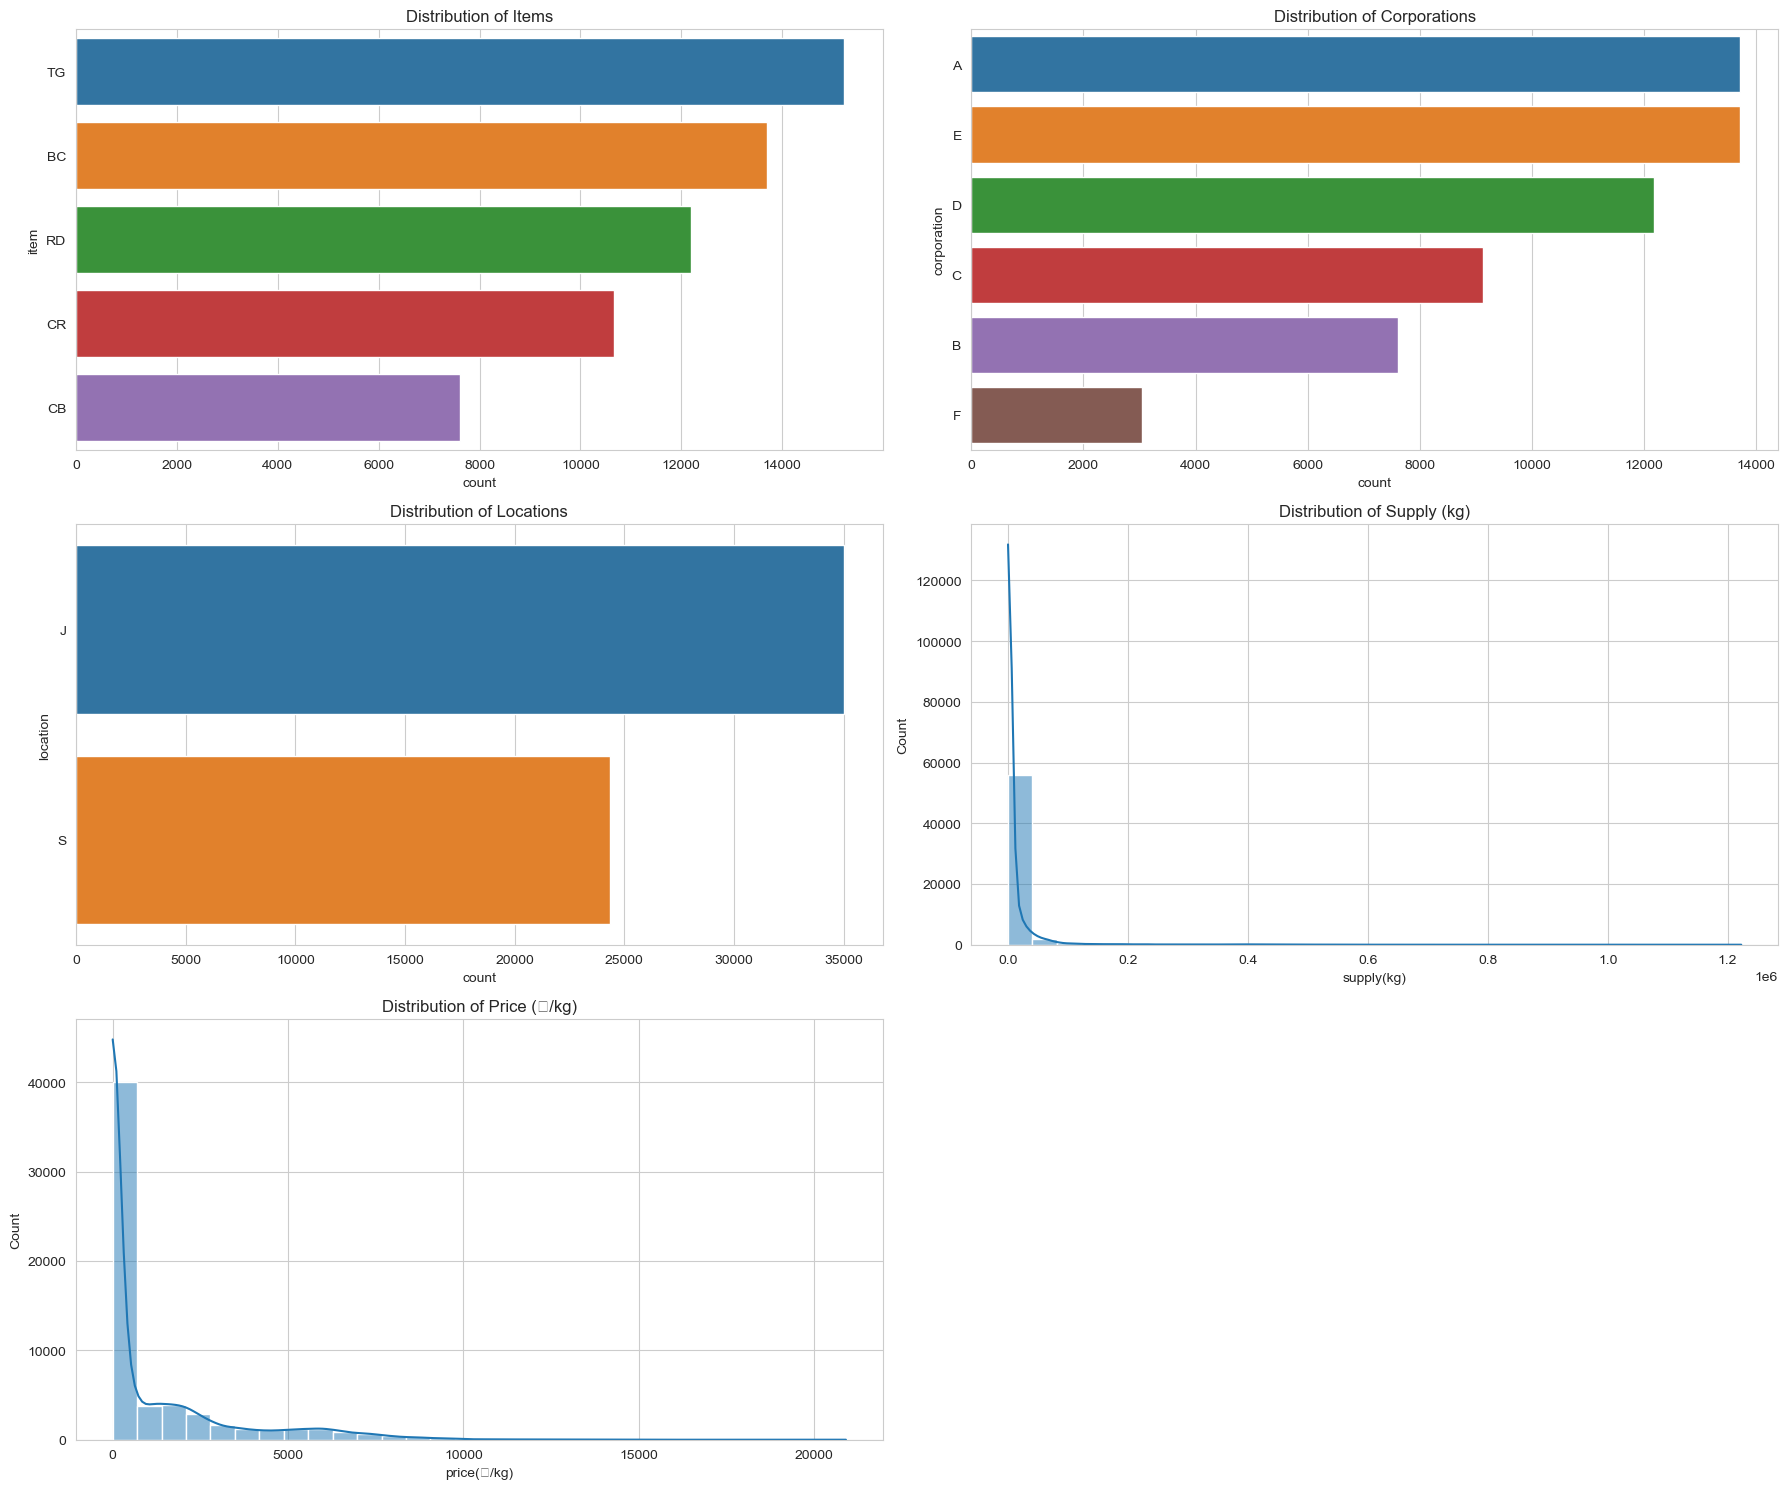

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(18, 15))

features = ['item', 'corporation', 'location', 'supply(kg)', 'price(원/kg)']
titles = ['Distribution of Items', 'Distribution of Corporations', 'Distribution of Locations', 'Distribution of Supply (kg)', 'Distribution of Price (원/kg)']

for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    if train_df[feature].dtype == 'object':
        sns.countplot(y=train_df[feature], order=train_df[feature].value_counts().index)
    else:
        sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(titles[i])
    #plt.ylabel('')

plt.tight_layout()
plt.show()

/var/folders/b4/44by_8095p37nnx24_7z5r0w0000gn/T/ipykernel_12943/3924803209.py:20: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/choisusie/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


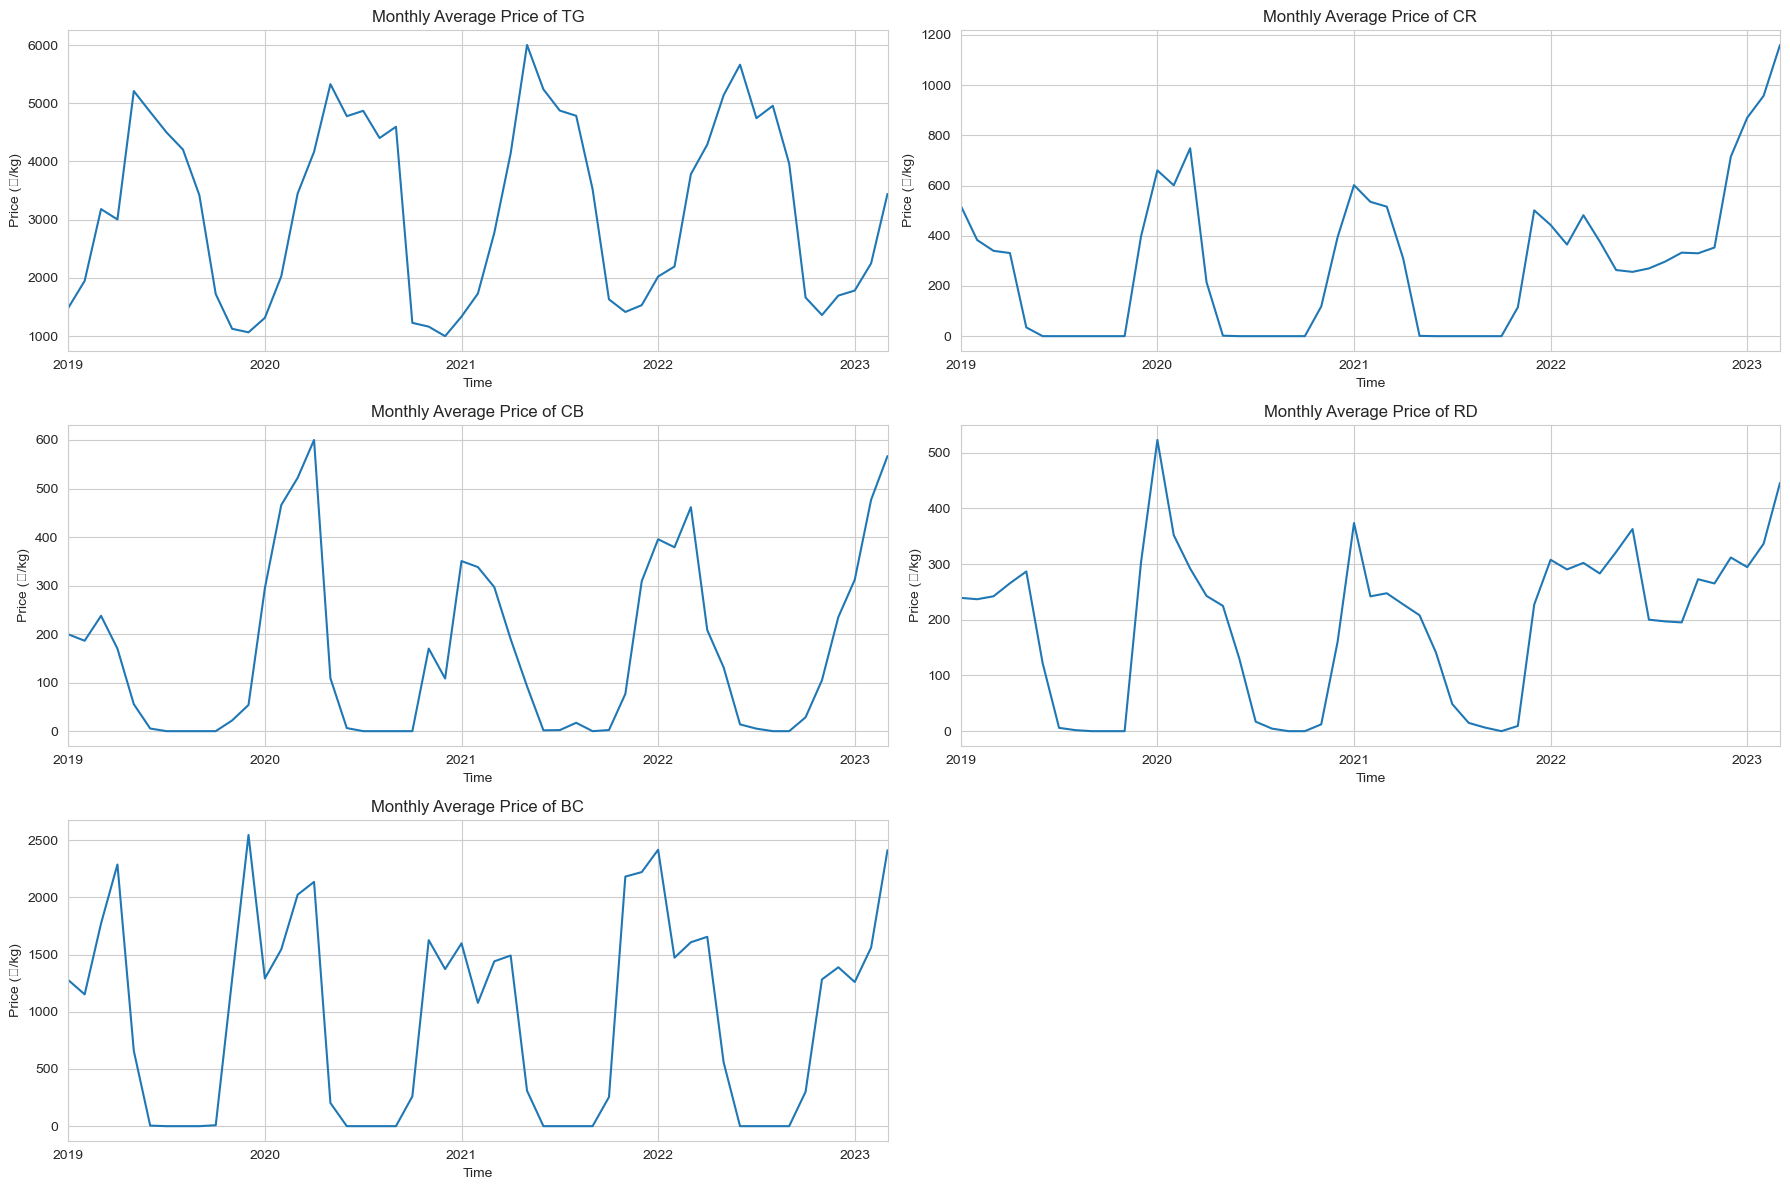

In [7]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df['month_year'] = train_df['timestamp'].dt.to_period('M')

plt.figure(figsize=(18, 12))

items = train_df['item'].unique()

for i, item in enumerate(items):
    plt.subplot(3, 2, i+1)
    
    item_data = train_df[train_df['item'] == item]
    
    monthly_avg_price = item_data.groupby('month_year')['price(원/kg)'].mean()
    
    monthly_avg_price.plot(label=item)
    plt.title(f'Monthly Average Price of {item}')
    plt.ylabel('Price (원/kg)')
    plt.xlabel('Time')

plt.tight_layout()
plt.show()